# Aviation Accident Database & Synopses, up to 2023 Analysis and Findings


<img src="cockpit.jpg" alt="Cockpit" width="650" height="450">

### I.Overview

This project reviews data from the NTSB aviation accident database contains information from 1962 upto 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters .As the company expands into new industries, it acknowledges the crucial need to assess and manage the risks linked to aircraft operations. Although the aviation sector is profitable, it involves inherent risks that require careful analysis to ensure well-informed purchasing decisions.

### II.Business Understanding
The company seeks to broaden its portfolio by venturing into the aviation sector, intending to acquire and manage aircraft for both commercial use and private uses. The objective is to pinpoint the aircraft that carry the most risk, thereby ensuring safety through the actions to be taken and reducing potential liabilities. This information will guide the purchasing decisions for the new aviation division, focusing on safety and reliability.


### III.Data Understanding
The dataset includes temporal data with incident dates and information on accident identification from [National Transportation Safety Board (NTSB)](http://www.ntsb.gov/)  and it available on [Kaggle NTSB aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) upto *2023* such as distinct event identifiers and inquiry kinds. There is location information available, including precise locations and countries of occurrence; nevertheless, there is up to 40% missing data in certain location variables.<br> 
<br>
The manufacturers, models, classifications, registration numbers, engine types, and number of engines are all covered in the information about aircraft; the percentage of missing data varies from 20% to 40% in different fields. Federal Aviation Regulations (FAR) descriptions, flight schedules, flight objectives, and air carriers are among the flight-related data, with significant missing values.
<br>
<br>
The evaluation of data quality indicates that different columns have differing degrees of missing data, which calls for cautious management to guarantee correct analysis. Cleaning the data by resolving missing values, eliminating duplicates, and fixing inconsistencies are preprocessing steps.<br>
<br>
Using descriptive statistics to summarise broad trends, exploratory data analysis (EDA) will also use heat maps, scatter plots, and histograms to visualise patterns. Multivariate analysis can be used to look at the combined effects of several factors on accident chances, and correlation analysis can be used to find correlations between variables, such as aircraft models and accident severity establishing solid basis for risk assessment and analysis using thorough data preparation and understanding, assisting the business in making safe and well-informed decisions in its new aviation investements and Ventures

### 1.Importing the necessary libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
%matplotlib inline

Loading the "AviationData.csv" using read_csv

In [2]:
df = pd.read_csv("AviationData.csv",encoding='latin1')
stc =pd.read_csv("USState_Codes.csv",index_col=0 ,)
df.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_8268\4085860131.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv",encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


### 2. Checking the data size and previewing the Data

In [3]:
# finding the shape of the Data frame
df.shape
num_rows = df.shape[0] #Provides the number of rows in the dataset
num_cols = df.shape[1] #Provides the number of columns in the dataset

print(f"The number of rows are" ,num_rows)
print(f"The number of Columns are" ,num_cols)

The number of rows are 88889
The number of Columns are 31


##### Looking at the first few sample of the Dataset to see how the data looks like

In [4]:
# Viewing the first few rows
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


### 3.Data Cleaning and Data Handling

To get an in depth understanding of the Data in hand i have to perform investigative diagnostics into the Data frame using code sarting with some various python inbuilt methods e.g <br>
.info<br>
.describe<br>
Once i've gained some information about the dataframe eg the umber of rows and the number of columns ill have to deal with various issues such as <br>
* Structural issues <br>
* Missing values<br>
* Duplicates<br>
* Outliers<br>



In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Preparing the Data 

Finding useful information about the Dataset like the field names

In [6]:
# performing some investigation
# Checking to see if there are any null Values
df.info
df.isnull().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

###  Which fields have missing data?

#### How much of each column is missing

In [7]:
# Finding how much of the columns are Null values
df.isna().mean() *100


Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

###  Handling missing Data(null Values)
There are many columns which are not important for analysis and some which are not  useful because of large volumes missing data
I will be dropping columns that have roughly more than 50% of their data missing and those that have very large significant data missing
'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight'

In [8]:
cols_drop =['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight' ]


df =df.drop(columns=cols_drop)

In [9]:

df = df.drop(columns=['Publication.Date'])

In [10]:
# previewing the Data set with less columns
df.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


There are more columns containing irrelevant information to my Analysis such as
'Accident.Number', 'Registration.Number', 'Report.Status' for easier handling od Data it'll be worth while to drop them


In [11]:
more_cols_drop =['Accident.Number', 'Registration.Number', 'Report.Status']
df = df.drop(columns=more_cols_drop)

 With the dropped columns we can see an improvement this reduction in missing data suggests improved data completeness, which can enhance the reliability of the analysis 







### Replacing the Missing values on the columns with Categorical Data with it's Mode 
Finding the Mode of columns with categorical data so as to replace the missing values to create a more balanced Dataset for example for Number.of.Engines,i filled missing data with 1 (the majority of airplanes have only one engine)

In [12]:
# Assigning the modes of these columns to Variables
Injury_severity_mode = df["Injury.Severity"].mode()[0]
Aircraft_Damage_mode = df["Aircraft.damage"].mode()[0]
Amateur_Built_mode = df["Amateur.Built"].mode() [0]
Engine_Type_mode = df["Engine.Type"].mode() [0]
Number_of_engines_mode =df['Number.of.Engines'].mode()[0]
Purpose_of_flight_mode = df['Purpose.of.flight'].mode()[0]

#Replacing missing values with Mode
df["Injury.Severity"].fillna(Injury_severity_mode, inplace=True)
df["Aircraft.damage"].fillna(Aircraft_Damage_mode, inplace=True)
df["Amateur.Built"].fillna(Amateur_Built_mode, inplace=True)
df["Engine.Type"].fillna(Engine_Type_mode, inplace=True)
df["Number.of.Engines"].fillna(Number_of_engines_mode, inplace=True)
df["Purpose.of.flight"].fillna(Purpose_of_flight_mode, inplace=True)



In [13]:

# ALternattively choosing to use a function to excecute the replacement of missing values with  the mode
def replace_missing_with_mode(df, columns):
    """
    Fill missing values in specified columns of a DataFrame with their respective mode.
    Parameters: - df (DataFrame): The input DataFrame.
                - columns (list): A list of column names in which missing values should be filled with mode.
    Returns: - DataFrame: A new DataFrame with missing values filled with mode in specified columns.
    """
    for col in columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        #print(f"Filled missing values in '{col}' with mode: {mode_value}")
    return df


This reusable function can be passed on new columns on the Data set which would require the aspect of replacing Missing values with the mode

In [14]:
# using the function place_missing_with_mode()
df = replace_missing_with_mode(df,["Injury.Severity", "Aircraft.damage", "Amateur.Built", "Engine.Type", "Number.of.Engines", "Purpose.of.flight"])
df.isnull().mean( )*100


Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            0.000000
Aircraft.damage            0.000000
Make                       0.070875
Model                      0.103500
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
dtype: float64

### Dropping Rows
The columns where the Missing Data is close to none or negligible ive opted to drop the rows as this wouldnt affect the quality and integrity of the Dataset

In [15]:
# Drop rows with missing data in various columns
df.dropna(subset=['Make'], inplace=True)
df.dropna(subset=['Model'], inplace=True)
df.dropna(subset=['Location'], inplace=True)
df.dropna(subset=['Country'], inplace=True)
df.dropna(subset=['Weather.Condition'],inplace=True)

In [16]:
# Alternatively i also chose to define a function to Drop the rows
def drop_missing_data_rows(df, columns):
    """
    Drops rows with missing data in the specified columns.
    Parameters: -df (pd.DataFrame): The input DataFrame.
                -columns (list): A list of column names to check for missing data.
    Returns: --pd.DataFrame: The DataFrame with rows containing missing data in the specified columns dropped.
    """
    for column in columns:
        df.dropna(subset=[column], inplace=True)
    return df


This function is reusable and  can be passed on new columns on the Data set which would require the aspect of dropping the rows which have Missing values with the mode

In [17]:

#Using the function
df = drop_missing_data_rows(df,['Make', 'Model', 'Location', 'Country', 'Weather.Condition'])
df.isnull().mean() * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      13.161494
Total.Serious.Injuries    14.322418
Total.Minor.Injuries      13.609925
Total.Uninjured            6.612268
Weather.Condition          0.000000
dtype: float64

For Fatal.Injuries, Serious.Injuries, Minor.Injuries, Uninjured, fill missing data with 0. 

In [18]:
# filling missing data with 0 for Fatal.Injuries, Serious.Injuries, Minor.Injuries, Uninjured
df.fillna(value={'Total.Fatal.Injuries': 0,
                'Total.Serious.Injuries': 0,
                'Total.Minor.Injuries': 0,
                'Total.Uninjured': 0,} , 
          inplace = True)

In [19]:
df.isnull().mean() *100

Event.Id                  0.0
Investigation.Type        0.0
Event.Date                0.0
Location                  0.0
Country                   0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Make                      0.0
Model                     0.0
Amateur.Built             0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
dtype: float64

The amount of missing Values has been greatly removed from the Dataset therefore it is more balanced and our Dataset is free from Missing values lets once again run Diagnostics to see if there are structural issues



In [20]:
# Checking once again the shape of the Data set and the information to see if there any structural issues
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 84071 entries, 0 to 88886
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84071 non-null  object 
 1   Investigation.Type      84071 non-null  object 
 2   Event.Date              84071 non-null  object 
 3   Location                84071 non-null  object 
 4   Country                 84071 non-null  object 
 5   Injury.Severity         84071 non-null  object 
 6   Aircraft.damage         84071 non-null  object 
 7   Make                    84071 non-null  object 
 8   Model                   84071 non-null  object 
 9   Amateur.Built           84071 non-null  object 
 10  Number.of.Engines       84071 non-null  float64
 11  Engine.Type             84071 non-null  object 
 12  Purpose.of.flight       84071 non-null  object 
 13  Total.Fatal.Injuries    84071 non-null  float64
 14  Total.Serious.Injuries  84071 non-null  flo

(84071, 18)

### Checking for Duplicates
Duplicated data might prove challenging to deal with in the future and may cause inaccuracies while analysing an forming insights on the Data in the future therefore we have to check and remove duplicated information

In [21]:
# checking for duplicated Data using duplicated() function
duplicates = df.duplicated()
if_duplicates = duplicates.any()
print(f"DataFrame has duplicates: {if_duplicates}")#Returns boolean value of whether df has duplicates

DataFrame has duplicates: True


Showing the number of the duplicated values



In [22]:
# Calculating the sum of the Duplicated Values
num_duplicates = duplicates.value_counts()
num_duplicates

False    84033
True        38
Name: count, dtype: int64

Checking to see if duplicates are in individual column or if they are in each column


In [23]:
# Finding count of Duplicates on each column
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.count())

Event.Id                  38
Investigation.Type        38
Event.Date                38
Location                  38
Country                   38
Injury.Severity           38
Aircraft.damage           38
Make                      38
Model                     38
Amateur.Built             38
Number.of.Engines         38
Engine.Type               38
Purpose.of.flight         38
Total.Fatal.Injuries      38
Total.Serious.Injuries    38
Total.Minor.Injuries      38
Total.Uninjured           38
Weather.Condition         38
dtype: int64


Dropping the Duplicates and previewing the Data

In [24]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)
# Reset index after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.shape


(84033, 18)

In [25]:
x = df.copy()
#x = x.drop_duplicates(subset=["Event.Id"]).reset_index(drop=True)
x["Event.Id"].duplicated().value_counts()


Event.Id
False    83158
True       875
Name: count, dtype: int64


 ## 4.Exploratory Data Analysis and Visualisation 

### Country Counts
Listing the number of entries for eeach country in the dataset could prove insightful


In [26]:
df['Country'].value_counts()

Country
United States    81509
Bahamas            195
Mexico             162
Canada             138
Brazil             110
                 ...  
Scotland             1
BLOCK 651A           1
Morocco              1
Jordan               1
Côte d'Ivoire        1
Name: count, Length: 181, dtype: int64

<Figure size 600x400 with 0 Axes>

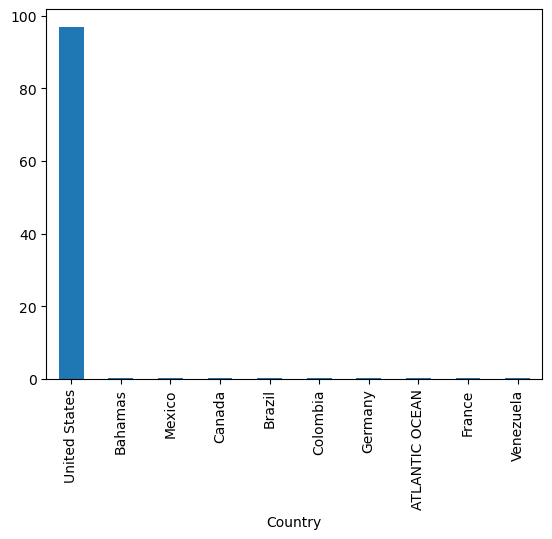

<Figure size 600x400 with 0 Axes>

In [27]:
#plotting a simple bar graph to show the first 10 countries with the most entries
Country = df['Country'].value_counts(normalize=True, dropna=False)[:10]*100
Country.plot(kind="bar");
plt.figure(figsize=(6,4))




Based of of the plot we can see the dataset primarily contains data from the United States, which makes up more than 90% of the entries. Other significant countries represented include Canada, Brazil, the United Kingdom, and Mexico. Given the predominance of U.S. data, we'll narrow our focus to U.S. accidents involving at least one fatality, starting from January 1982, as data prior to this date is incomplete.

### Converting the event Date to an appropriate Format

In [28]:
#Convert 'Event.Date' to datetime
df['Date'] = pd.to_datetime(df['Event.Date'])
#Drop 'Event.Date' column
df.drop('Event.Date', axis=1, inplace=True)
#Filtering for fatal cases and a time period starting in 1985
# Selecting only the united states 
df_fatal_cases = df.loc[(df['Total.Fatal.Injuries']>0) &
           (df['Date']>='1985-01') &
           (df['Country'] == 'United States'),
            :]

In [29]:
df_fatal_cases.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Date
count,12979.000000,12979.000000,12979.000000,12979.000000,12979.000000,12979
mean,1.164265,1.977425,0.203637,0.155636,0.356114,2000-08-19 08:52:53.125818752
min,0.000000,1.000000,0.000000,0.000000,0.000000,1985-01-01 00:00:00
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1991-06-18 00:00:00
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1999-04-22 00:00:00
75%,1.000000,2.000000,0.000000,0.000000,0.000000,2008-09-25 00:00:00
max,4.000000,265.000000,137.000000,125.000000,334.000000,2022-12-05 00:00:00
std,0.416543,5.005163,2.080125,1.969047,6.801197,NaN


Lets define a useful function to make a bar plot so that we may get to explore some of the Data and that it may become easier for the handling of Data

In [30]:
    
def plot_value_counts_bar(series, title, xlabel, ylabel, topN=20, figsize=(8,6)):
    """
    Count the number of occurrences of each unique value in theinput series.
    Parameters:
    series      : data series to make a plot on
    title (str) : figure title
    xlabel (str): figure x-axis label
    ylabel (str): figure y-axis label
    topN (int)  : number of top counts to plot
    figsize (tuple of two integers): figure size width x height, default (8,6)
    Returns:
    Creates a bar plot
    """
    plt.figure(figsize=figsize)
    vals = series.value_counts(normalize=True, dropna=False)[:topN] * 100
    
    # Create a colormap with a distinct color for each bar
    unique_colors = plt.cm.get_cmap('tab20', len(vals))
    
    # Plot with custom colors
    bars = plt.bar(vals.index, vals.values, color=[unique_colors(i) for i in range(len(vals))])
    
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=75)
    
    plt.show()

Now after all the preparation we may attempt to formulate and answer some specific questions

## Analysis 1: Are airplanes more safe or less safe during the last few decades?
Let us investigate the year to year Fatality rate by using pandas groupby( ) we can conjoin the Year together with the aggregates which are the sum and the counts of fatal injuries

In [31]:
fatal_statistics= df_fatal_cases['Total.Fatal.Injuries'].groupby([df_fatal_cases['Date'].dt.year]).agg({'sum','count'})
fatal_statistics

,count,sum
Date,,
1985,558,1344.0
1986,514,1153.0
1987,491,1192.0
1988,493,892.0
1989,477,1057.0
1990,498,940.0
1991,477,1031.0
1992,483,972.0
1993,426,805.0


Now lets plot a graph

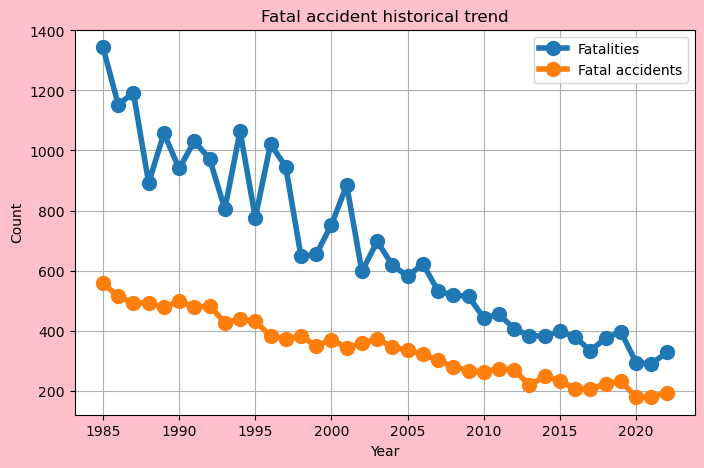

In [32]:
#Plotting a bar graph to show the rate of Fatal Inuries over time
plt.figure(figsize=(8,5))
# Using a Seaborn color palette
palette = sns.color_palette("muted",2)   
# Plot with Seaborn colors
plt.plot(fatal_statistics[['sum','count']], 'o-', lw=4, ms=10 )
plt.gcf().set_facecolor('pink') 
# Adding Labels
plt.legend(('Fatalities', 'Fatal accidents'))
plt.title('Fatal accident historical trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
# Show
plt.show()

From the above plot we can see that the total fatal injuries and instances decrease overtime<br>
Examining the NTSB accident data from the past four decades reveals a noticeable trend of declining fatal accidents and fatalities, highlighting increased air travel safety over the last 40 years ,a significant spike in fatalities may have happened in 2001 due to the tragic 9/11 events, when four airplanes crashed in a single day.
 ### Recommendation
Based of of this analysis i'd recommend the stakeholders to invest in advanced safety technologies and continuous staff training ,
the reasoning behind this is the decline in fatal accidents shows safety improvements are helpful to both them and the customers. Prioritizing safety aligns the business with industry standards, enhancing customer priority and confidence .

secondly the business should highlight the improving safety records in marketing campaigns to build trust and attract customers and assure them tha choosing their line of work is the correct way the reasoning is that the decline in fatal accidents is a strong selling point. Showcasing safety commitment differentiates the business and appeals to safety-conscious travelers.
They could do this by emphasizing safety in marketing and engage in PR efforts.

## Analysis 2 : Which airplane Make has the highest fatal accidents ?,and is the type of Engine a factor ?

C:\Users\user\AppData\Local\Temp\ipykernel_8268\1912604929.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', len(vals))


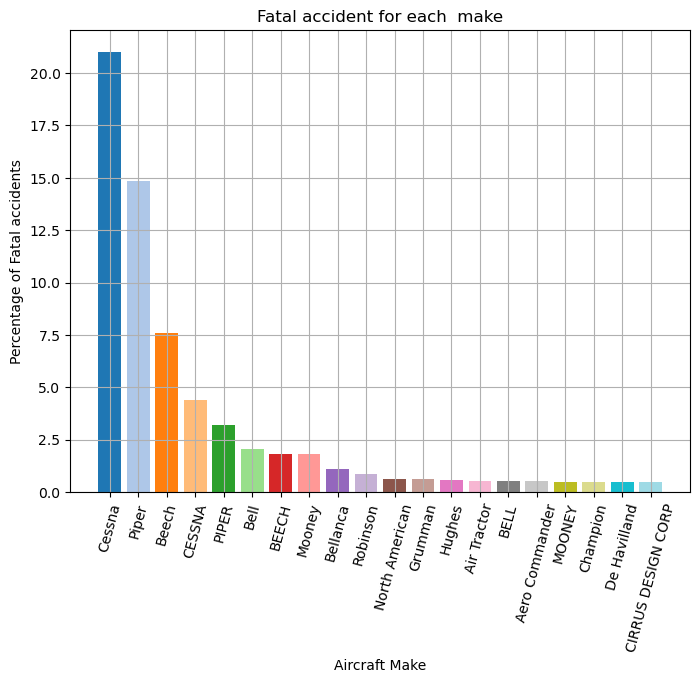

<Figure size 640x480 with 0 Axes>

In [33]:
# Calling on the function plot_value_counts_bar
# To see which type of Airplane has  highest fatal accidents
plot_value_counts_bar(series = df_fatal_cases["Make"], 
                      title  = "Fatal accident for each  make", 
                      xlabel = "Aircraft Make", 
                      ylabel = "Percentage of Fatal accidents")

plt.gcf().set_facecolor('blue') 



There is an underlyng issue in the Dataset where "CESSNA" and "cessna" which are the same model have been listed as two separate models similarly we can see the same thing in "PIPER" and "piper" and also "BEECH" and "Beech"<br>
We can change this by changing them to uppercase to avoid the redundant repetitions

C:\Users\user\AppData\Local\Temp\ipykernel_8268\1912604929.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', len(vals))


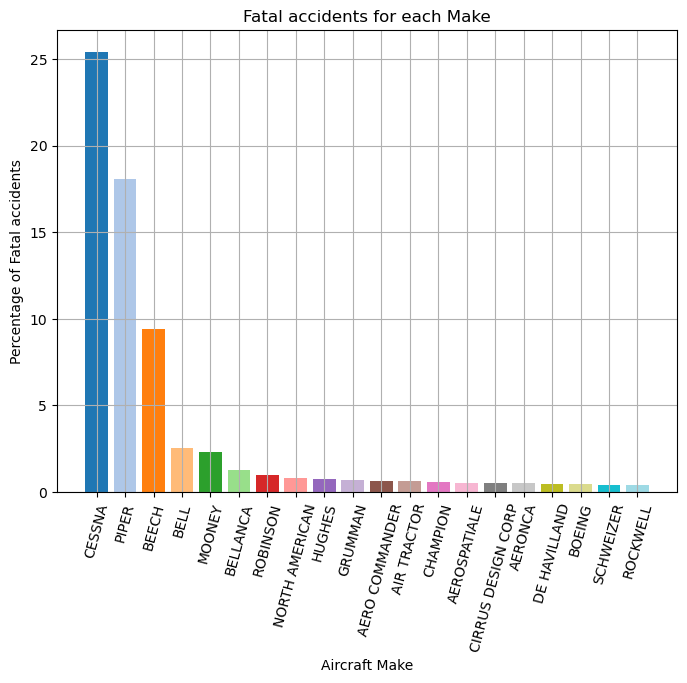

In [34]:
# Changing the names of the Make to be Uppercase
plot_value_counts_bar(series = df_fatal_cases["Make"].str.upper(), 
                      title  = "Fatal accidents for each Make", 
                      xlabel = "Aircraft Make", 
                      ylabel = "Percentage of Fatal accidents")

Following the above plot we can formulate an understanding on which are the big three makes with the most fatalities
Approximately 26% of fatal accidents involve Cessna aircraft, followed by Piper with 19%, and Beech with 9%.

 Seeing which Engine types are most involved in Aviation accidents

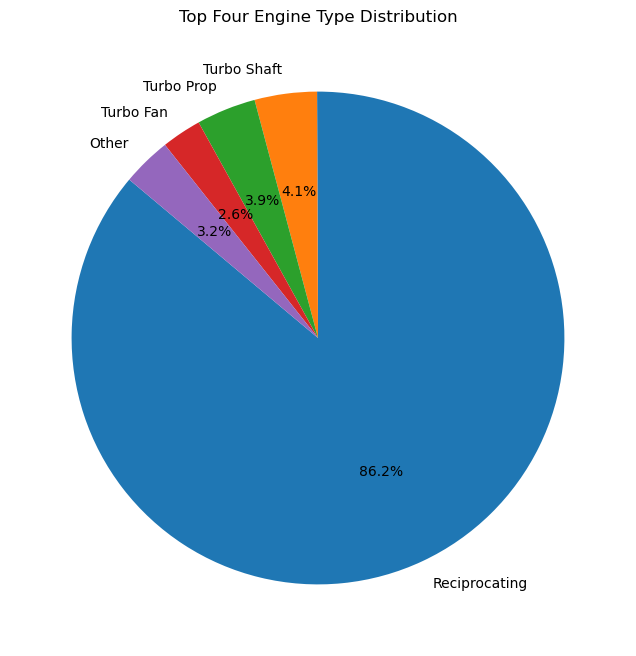

In [35]:
# Seeing which Engine types are most involved in Aviation accidents

# Aggregate data and sort by counts
engine_type_counts = df['Engine.Type'].value_counts()

# Select top four engine types
top_four_engine_types = engine_type_counts.nlargest(4)

# Aggregate the remaining types into 'Other'
other_count = engine_type_counts[4:].sum()

# Create a new Series for the top types and 'Other'
engine_type_counts_top = pd.concat([top_four_engine_types, pd.Series({'Other': other_count})])

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(engine_type_counts_top, labels=engine_type_counts_top.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Four Engine Type Distribution')
plt.show()

### Lets find out if there is a relationship between the Make and the Engine Types
By using a contingency table we can perform a bivariate Analysis to see whether the type of engine in a specific Aircraft could be linked with amount of Accidents

In [36]:
# Creating a contingency table of Make and Engine.Type
contingency_table = pd.crosstab(df['Make'].str.upper(), df['Engine.Type'])

# Display the table
contingency_table.head(2)

Engine.Type,Electric,Geared Turbofan,Hybrid Rocket,LR,NONE,Reciprocating,Turbo Fan,Turbo Jet,Turbo Prop,Turbo Shaft,UNK,Unknown
Make,,,,,,,,,,,,
107.5 FLYING CORPORATION,0,0,0,0,0,1,0,0,0,0,0,0
1200,0,0,0,0,0,1,0,0,0,0,0,0


In [37]:

# Identifyig the most common Makes and Engine Types by performing a value count and selecting the largest
most_common_makes = df['Make'].str.upper().value_counts().nlargest(3).index  
most_common_engine_types = df['Engine.Type'].value_counts().nlargest(3).index 

# Filter the dataset for the most common Makes and Engine Types
fresh_df = df[df['Make'].isin(most_common_makes) & df['Engine.Type'].isin(most_common_engine_types)]

In [38]:
pivot_table = fresh_df.pivot_table(index='Make', columns='Engine.Type', values='Event.Id', aggfunc='count')
pivot_table


Engine.Type,Reciprocating,Turbo Prop
Make,,
BEECH,788,111
CESSNA,4157,87
PIPER,2466,57


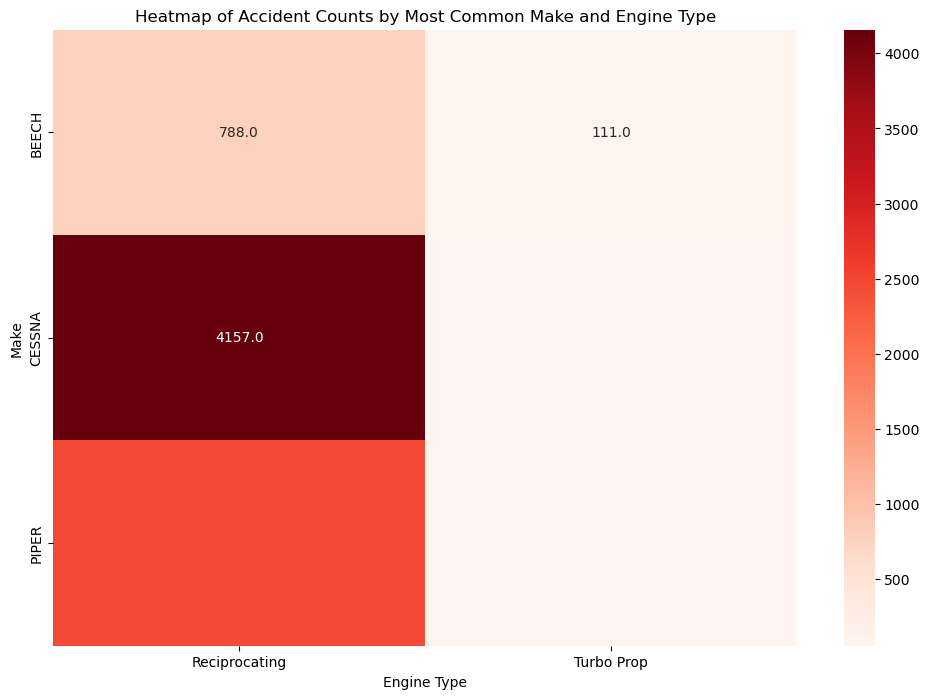

In [39]:
# Plotting the Heat map of The Make and the Engine types
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Reds")
plt.title('Heatmap of Accident Counts by Most Common Make and Engine Type')
# labells
plt.xlabel('Engine Type')
plt.ylabel('Make')
plt.show()

From this plot we can then establish that the Make which was "CESSNA" together with the engine type "Reciprocating" was related and they had an inter-relationship by being the leading make and engine types involved in most Aviation incidences rrspectively

### Recommendation
Avoid acquiring high-crash aircraft models and implement rigorous maintenance protocols the rationale is Identifying risky airplanes makes allows for the safer fleet acquisition and reduced risk. Enhanced maintenance ensures optimal operation they can do this by Conducting risk assessments before purchases, establishing stringent maintenance schedules, and collaborating with manufacturers on safety issues.

Implementing targeted safety protocols and inspections for the high-risk engine type the reasoning behind this is Addressing the engine-specific risk with focused preventive measures reduces accident likelihood by developing tailored inspection programs, training maintenance crews on specific issues, and collaborating with manufacturers for safety updates and upgrades.For instance according to investigators, reciprocating engine-powered aircraft continue to crash with the wrong type of fuel in their tanks

## Analysis 3 : Which weather conditions are the Harshest when it comes to Air Transport ?

C:\Users\user\AppData\Local\Temp\ipykernel_8268\1912604929.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', len(vals))


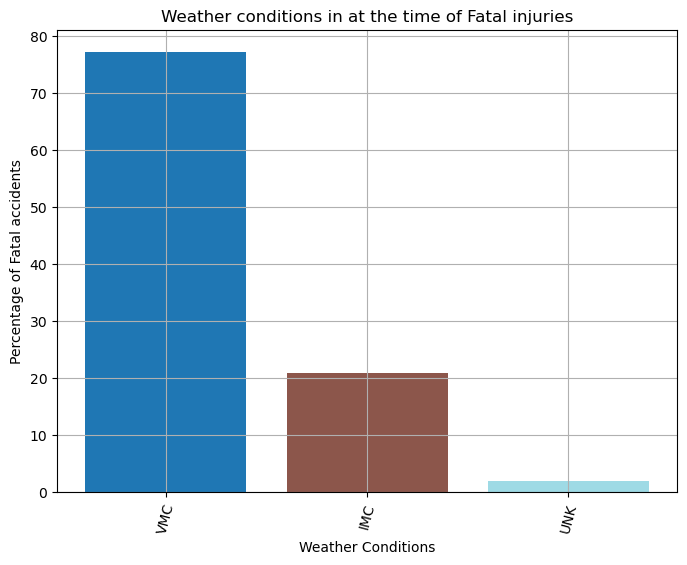

In [40]:
# Changing the names of the Make to be Uppercase
plot_value_counts_bar(series = df_fatal_cases["Weather.Condition"].str.upper(), 
                      title  = "Weather conditions in at the time of Fatal injuries", 
                      xlabel = "Weather Conditions", 
                      ylabel = "Percentage of Fatal accidents")

Based of of this plot there are three different weather conditions <br>
* VMC or rather(Visual Meteorological Conditions) <br>
* IMC (Instrument Meterological Conditions)<br>
* UNK(Unknown)<br>


 We can see That the leading percentage of fatal injuries occur mostly during the VMC or rather(Visual Meteorological Conditions) then followed byIMC (Instrument Meterological Conditions)<br>
While practically the UNK(Unknown) does not contribute a lot <br>
while IMC conditions are inherently more challenging and risky, the structured and cautious approach required tends to mitigate those risks effectively. Conversely, the perceived safety and ease of VMC can lead to complacency, overconfidence, and a higher incidence of accidents resulting in a lot of fatal injuries.<br>
In hindsight Stakeholders should consider investing in aircraft equipped with advanced technology and instrumentation to better handle challenges that arise even in Visual Meteorological Conditions (VMC). This proactive approach can significantly enhance safety by reducing the risks associated with pilot overconfidence, unexpected weather changes, and other potential hazards that VMC alone cannot mitigate.Therefore greatly reducing the instances of potential accidents








### Recommendations
Equipping aircraft with advanced weather monitoring tools and decision support systems because these systems help pilots make informed decisions, reducing the likelihood of fatal injuries steps that should be taken are installing advanced weather radar, integrating real-time decision support systems, and providing continuous training for effective utilization.

Invest in comprehensive pilot training and simulation for handling flights in VMC and IMC conditions. Despite VMC being safer, high fatal injury rates indicate a critical need for situational awareness training. Improved proficiency in both conditions reduces accidents by Implementing advanced simulation training, conducting regular refresher courses, and integrating real-life case studies into training modules.

In [41]:
df_fatal_cases.head(2)

,Event.Id,Investigation.Type,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Date
10535,20001214X35495,Accident,"EDGEWOOD, NM",United States,Fatal(2),Destroyed,Cessna,310N,No,2.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1985-01-01
10539,20001214X35584,Accident,"PAWNEE CITY, NE",United States,Fatal(1),Substantial,Cessna,150F,No,1.0,Reciprocating,Personal,1.0,1.0,0.0,0.0,VMC,1985-01-02


## Analysis 4 : Which purposes of Flight caused more Accidents ?

C:\Users\user\AppData\Local\Temp\ipykernel_8268\1912604929.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', len(vals))


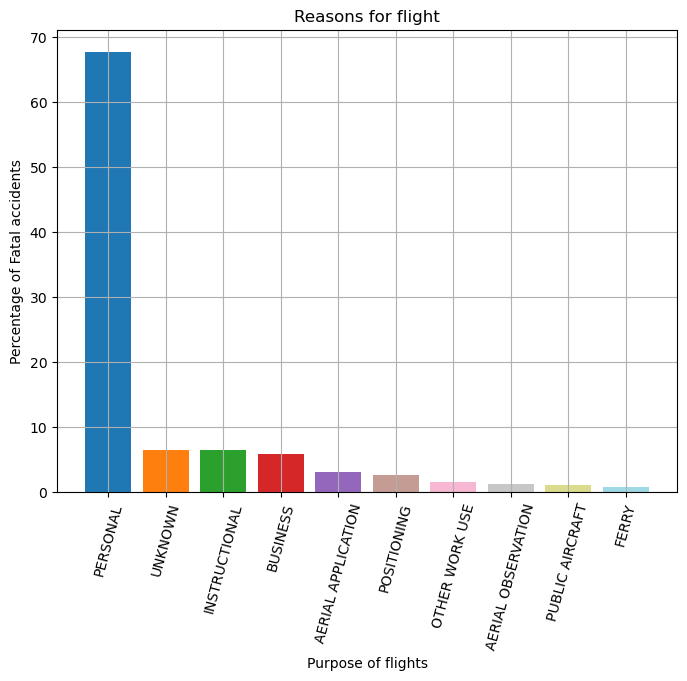

In [42]:
plot_value_counts_bar(series = df_fatal_cases["Purpose.of.flight"].str.upper(), 
                      title  = "Reasons for flight", 
                      xlabel = "Purpose of flights",
                      ylabel = "Percentage of Fatal accidents",
                      topN=10 )

### Recommendations
Enhancing Safety Protocols for Personal and Unknown Purposes and Developing stringent safety guidelines and checklists for personal and unknown flight purposes. Provide specialized training on risk management and decision-making for non-commercial flights. Collaborate with aviation safety authorities to enhance awareness and compliance. 

Implement Robust Safety Oversight and Reporting Mechanisms and establish comprehensive safety oversight and reporting systems for all flight purposes. Implement a confidential reporting system for pilots, conduct regular safety audits, and foster a safety culture focused on continuous improvement and learning.

## Analysis 5 : What are the regions, states and the cities most affected by these Aircraft incidences ?

Now we want to localise to which cities and states are more affected by Aeronautical accidents

In [43]:
df_us = df_us = df[df['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [44]:
df_us = df_us.copy()

In [ ]:

# Due to errors with the loaded csv USState_Codes.csv I opted to use the underlying list of valid state codes valid_stc
valid_stc = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]
# Defining the function to extract city and state from the Location and to c
def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        print(f"Location: {location}, Last Two Chars: {last_two_chars}") 
        # Debug print
        if last_two_chars in valid_stc:
            city = location[:-4].strip()  # Adjust to handle ", " before state code
            print(f"Extracted City: {city}, State: {last_two_chars}")  # Debug print
            return city, last_two_chars
        else:
            print(f"Not Applicable Location: {location}")  # Debug print
            return location, "Not Applicable"
    else:
        return np.nan, np.nan
    # Apply the function to create 'City' and 'State' columns
df_us[['City', 'State']] = df_us['Location'].apply(extract_city_state).apply(pd.Series)
    

In [47]:
# getting rid of trailing commas in City column
df_us['City'] = df_us['City'].str.rstrip(',')

In [48]:
# having devided Location and Date columns, now we can drop these as well
df_us.drop(columns=['Date', 'Location'], inplace=True)

In [49]:
#Preview the DataFrame to see if the changes have been made to the  label row
df_us.head(2)

,Event.Id,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,City,State
0,20001218X45444,Accident,United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,MOOSE CREEK,ID
1,20001218X45447,Accident,United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,BRIDGEPORT,CA


C:\Users\user\AppData\Local\Temp\ipykernel_8268\1484211449.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis', len(top_10_states))


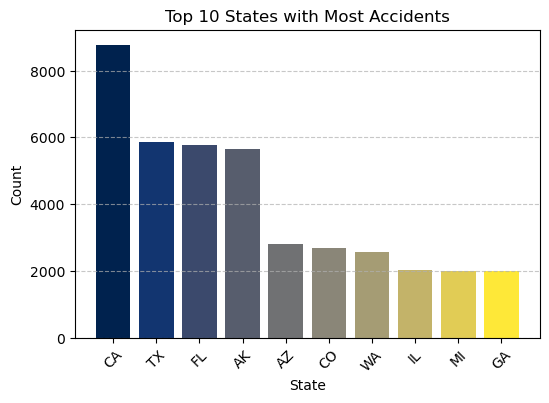

In [50]:
# Let's have a look at top ten states with most accidents 
top_10_states = df_us['State'].value_counts().head(10)
#Gtting Colour pala from cmap
cmap = cm.get_cmap('cividis', len(top_10_states))
colors = cmap(range(len(top_10_states)))


plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Lets then Plot a heat map to show the States that have been Affected mostly by Aviation Accidents through out the years from 1982

In [51]:
# A heatmap visualising the distribution of aviation accidents around the US
state_counts = df_us['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

import plotly.express as px
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of Aviation Accidents Around the US",
    color_continuous_scale= 'Oranges',

)
fig.show()

### Recommendations
Investing in upgrading aviation infrastructure and adopting advanced technologies in high-accident states to enhance safety and operational efficiency. Improved infrastructure and technology reduce accident risks and enhance safety standards by Upgrading airport facilities, deploying advanced air traffic management systems and weather monitoring, and advocating for regulatory reforms with local authorities and industry partners.

Conducting detailed safety assessments and develop tailored safety plans for high-accident states like California, Texas, Florida, and Alaska. Concentrated accidents highlight localized safety challenges. Addressing these through targeted plans can mitigate risks and enhance safety by collaborating with local authorities, analyzing accident data, implementing state-specific safety initiatives, and engaging community stakeholders to promote safety culture.

## Conclusions
In conclusion after the thorough investigation i've perfomed through the data preparation and analysis there has been a significant decrease in aviation accidents since 1982 which has been encouraging in the aviation sector, but it's clear that certain states, such as  Texas, Florida and California still experience significantly higher accident rates.  Addressing this issue, it is imperative to continually enhance the safety protocols, regulations, and the procedures in place. Regular reviews and updates of these measures should be given paramount priority so as to stay ahead of emerging risks. In high-accident states, there should be a concerted effort to increase surveillance and regulatory enforcement activities to mitigate the risks associated with aviation accidents.

The majority of Aviation accident incidents occur during favourable weather. Pilots may grow confident in these weather conditions because they believe there are less risks than in the harsher conditions. This can lead to a careless attitude toward safety standards and possibly unsafe activities, such as  flying in low levels and at high speeds while performing  aerobatics, which increase the chances of accidents. It is advised that unsafe behaviours should be discouraged  , it is essential to emphasise the significance of flying within specified safety standards.

Similarly personal flights are responsible for big portion of aviation accidents, for personal flights, comprehensive education and training programs should be promoted for pilots. Insisting on a safety-first culture within the personal aviation community is essentialc,by making safety a top priority in all personal flight activities the reduction of accidents is materialized. Pilots must be well-prepared and aware of the potential risks associated with personal aviation, regardless of the weather conditions and the level of skillset the pilot has thus having a minimal chance  for the possibility of accidents

## Final Recommendations


* #### Enhance Safety Protocols Across All Operations: <br>
Implement safety protocols all through, regardless of flight purpose or location. Provide ongoing training to enhance risk management and decision-making skills for all crew. Foster a proactive safety culture with incident reporting and continuous learning.<br>

* #### Invest in Advanced Technology and Infrastructure: <br>
Upgrade aviation infrastructure, such as airports and runways, to exceed safety standards. Deploy advanced systems for air traffic management, weather monitoring, and decision support to improve situational awareness and operational efficiency. Advocate for regulatory reforms to enforce industry best practices.<br>

* #### Conduct Regional Safety Assessments and Planning:  <br>
Collaborate closely with local aviation authorities and stakeholders to analyze regional accident data. Develop customized safety plans for high-risk states or regions, focusing on specific risks and effective mitigation strategies. Engage local communities to promote safety initiatives aligned with their priorities.<br>

* #### Continuous Improvement and Monitoring: <br>
Regularly conduct safety audits and assessments to monitor effectiveness and identify areas for enhancement. Integrate insights from incidents, case studies, and industry advancements into ongoing training and operational procedures. Stay updated on emerging technologies, regulatory changes, and best practices to continually elevate safety standards and also operational practices.

In [ ]:
df.to_csv('')